**Частина 1**

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.datasets import fashion_mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train.shape, x_test.shape


((60000, 28, 28), (10000, 28, 28))

In [ ]:

import tensorflow as tf
import numpy as np
from keras.utils import to_categorical

num_classes = 10
learning_rate = 0.1
batch_size = 4096
num_features = np.product(x_train.shape[1:])

steps_per_epoch = len(x_train) // batch_size
print("steps_per_epoch", steps_per_epoch)

x_train = x_train.reshape((-1, 28, 28, 1)).astype("float32") / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype("float32") / 255.0

print(x_train.shape)
print(x_test.shape)


dataset_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))


dataset_train = (dataset_train
                 .repeat()
                 .shuffle(4096)
                 .batch(batch_size)
                 .prefetch(tf.data.experimental.AUTOTUNE)
                 )

dataset_test = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)


steps_per_epoch 14
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense

initializer = tf.keras.initializers.GlorotNormal(seed=0)

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(filters=56, kernel_size=(3, 3), kernel_initializer=initializer, activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=112, kernel_size=(3, 3), kernel_initializer=initializer, activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5, seed=0),

    Flatten(),
    Dense(4096, kernel_initializer=initializer, activation="relu"),
    Dropout(0.5, seed=0),
    Dense(10, kernel_initializer=initializer, activation="softmax")
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 56)        560       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 56)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 112)       56560     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 112)        0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 5, 5, 112)         0         
                                                                 
 flatten_7 (Flatten)         (None, 2800)             

In [ ]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(dataset_train,
                    epochs=100,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=dataset_test
                    )

Epoch 1/100
14/14 [==============================] - 5s 232ms/step - loss: 1.2982 - accuracy: 0.5717 - val_loss: 0.9051 - val_accuracy: 0.6956
Epoch 2/100
14/14 [==============================] - 3s 217ms/step - loss: 0.7586 - accuracy: 0.7273 - val_loss: 0.6252 - val_accuracy: 0.7583
Epoch 3/100
14/14 [==============================] - 3s 218ms/step - loss: 0.5764 - accuracy: 0.7829 - val_loss: 0.5248 - val_accuracy: 0.7992
Epoch 4/100
14/14 [==============================] - 3s 226ms/step - loss: 0.5047 - accuracy: 0.8122 - val_loss: 0.4686 - val_accuracy: 0.8296
Epoch 5/100
14/14 [==============================] - 3s 221ms/step - loss: 0.4588 - accuracy: 0.8322 - val_loss: 0.4294 - val_accuracy: 0.8462
Epoch 6/100
14/14 [==============================] - 3s 221ms/step - loss: 0.4269 - accuracy: 0.8472 - val_loss: 0.4061 - val_accuracy: 0.8534
Epoch 7/100
14/14 [==============================] - 3s 223ms/step - loss: 0.4020 - accuracy: 0.8547 - val_loss: 0.3834 - val_accuracy: 0.8621

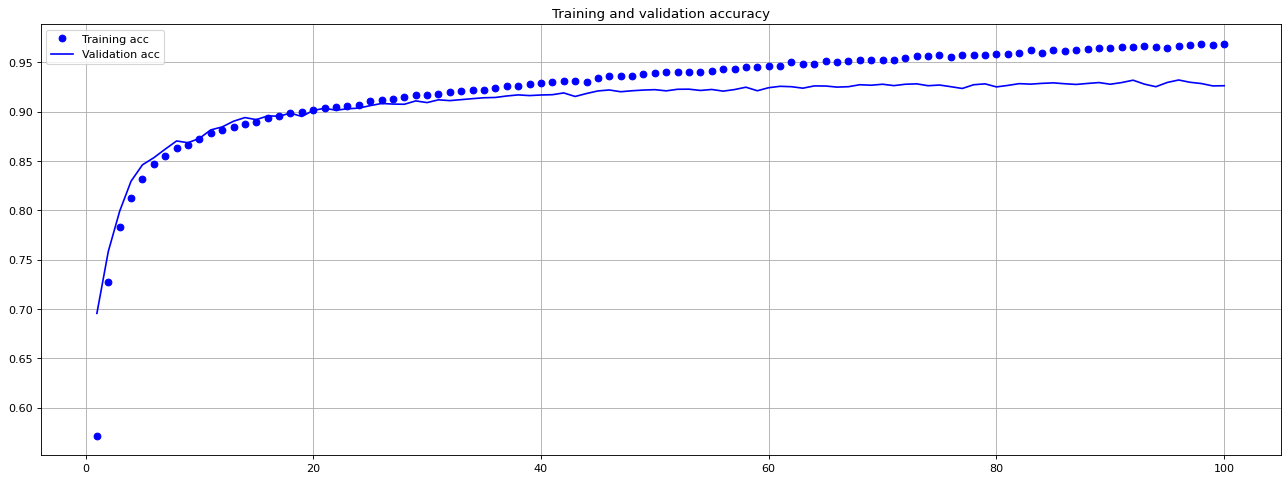

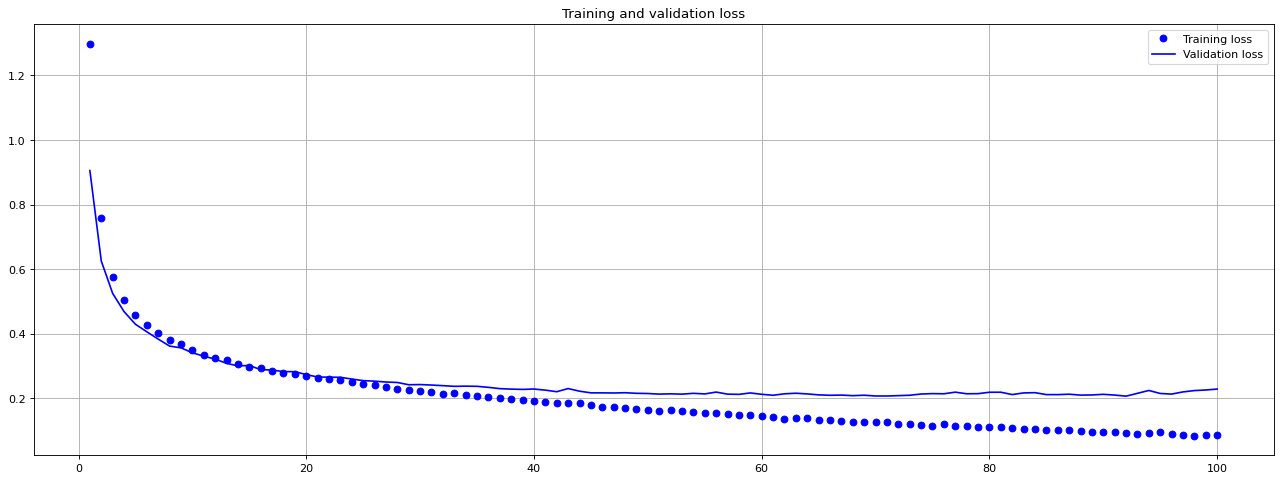

In [ ]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()

In [ ]:
results = model.evaluate(dataset_test)
print(results)

3/3 [==============================] - 0s 60ms/step - loss: 0.2287 - accuracy: 0.9264
[0.2286885678768158, 0.9264000058174133]


Дані багатошарової ремежі: loss: 0.3762 - accuracy: 0.8997

**Частина 2**
В цій частині ми знову будемо працювати з датасетом fasion_mnist.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу, що використовує VGG16 в якості згорткової основи.

Навчіть отриману мережу на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі.
**Під час навчання використовуйте прийоми донавчання та виділення ознак.**

Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [ ]:
import tensorflow as tf
import numpy as np


from keras.applications.vgg16 import VGG16
from keras import models
from keras import layers
from keras import optimizers
from keras.datasets import fashion_mnist
from keras.utils import to_categorical


(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = np.repeat(X_train[..., np.newaxis], 3, -1)
X_test = np.repeat(X_test[..., np.newaxis], 3, -1)
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 3)
(10000, 28, 28, 3)


In [ ]:
def resize_image(image, label):
    image = tf.image.resize(image, [224, 224])
    return image, label

In [ ]:
batch_size = 128
steps_per_epoch = len(X_train) // batch_size
dataset_train_2 = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
dataset_train_2 = (dataset_train_2
                 .repeat()
                 .map(resize_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
                 .shuffle(buffer_size=256)
                 .batch(batch_size)
                 .prefetch(tf.data.experimental.AUTOTUNE)
)

dataset_test_2 = tf.data.Dataset.from_tensor_slices((X_test, Y_test))
dataset_test_2 = (dataset_test_2.map(resize_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
                .batch(batch_size)
                )

In [ ]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
conv_base.trainable = False
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.optimizers.legacy import Adam

modified_model = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(32, activation="relu"),
   layers.Dropout(0.5),
   layers.Dense(10, activation="softmax"),
])

modified_model.compile(optimizer=tf.optimizers.Adam(learning_rate=2e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


modified_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 25088)             0         
                                                                 
 dense_10 (Dense)            (None, 32)                802848    
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 15,517,866
Trainable params: 803,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)
tf_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)
tf_model = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
tf_tensorboard = TensorBoard(log_dir='./logs')

callbacks = [lr_scheduler, tf_stopping, tf_model, tf_tensorboard]

In [ ]:
history = modified_model.fit(dataset_train_2,
                             epochs=5,
                             batch_size=batch_size,
                             steps_per_epoch=steps_per_epoch,
                             validation_data=dataset_test_2,
                             callbacks = callbacks
                             )

Epoch 1/5
468/468 [==============================] - ETA: 0s - loss: 1.6045 - accuracy: 0.4396
Epoch 1: val_accuracy improved from -inf to 0.77900, saving model to best_model.h5
468/468 [==============================] - 279s 590ms/step - loss: 1.6045 - accuracy: 0.4396 - val_loss: 1.0210 - val_accuracy: 0.7790 - lr: 2.0000e-05
Epoch 2/5
468/468 [==============================] - ETA: 0s - loss: 1.1821 - accuracy: 0.5966
Epoch 2: val_accuracy improved from 0.77900 to 0.82550, saving model to best_model.h5
468/468 [==============================] - 278s 595ms/step - loss: 1.1821 - accuracy: 0.5966 - val_loss: 0.7735 - val_accuracy: 0.8255 - lr: 2.0000e-05
Epoch 3/5
468/468 [==============================] - ETA: 0s - loss: 1.0484 - accuracy: 0.6400
Epoch 3: val_accuracy improved from 0.82550 to 0.84090, saving model to best_model.h5
468/468 [==============================] - 277s 592ms/step - loss: 1.0484 - accuracy: 0.6400 - val_loss: 0.6541 - val_accuracy: 0.8409 - lr: 2.0000e-05
Epoc

In [ ]:
results = modified_model.evaluate(dataset_test_2)
print(results)

79/79 [==============================] - 37s 467ms/step - loss: 0.5375 - accuracy: 0.8580
[0.537476122379303, 0.8579999804496765]


In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
modified_history = modified_model.fit(dataset_train_2,
                             epochs=3,
                             batch_size=batch_size,
                             steps_per_epoch=steps_per_epoch,
                             validation_data=dataset_test_2
                             )

Epoch 1/3
468/468 [==============================] - 273s 583ms/step - loss: 0.8636 - accuracy: 0.6999 - val_loss: 0.5022 - val_accuracy: 0.8618
Epoch 2/3
468/468 [==============================] - 274s 586ms/step - loss: 0.8299 - accuracy: 0.7136 - val_loss: 0.4650 - val_accuracy: 0.8692
Epoch 3/3
468/468 [==============================] - 274s 586ms/step - loss: 0.7961 - accuracy: 0.7252 - val_loss: 0.4419 - val_accuracy: 0.8717


In [ ]:
results = modified_model.evaluate(dataset_test_2)
print(results)

79/79 [==============================] - 38s 475ms/step - loss: 0.4419 - accuracy: 0.8717
[0.44191795587539673, 0.8716999888420105]
